In [139]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import seaborn as sns
import catboost

Загрузим дата сет

In [140]:
file_dir = './dataset/'
train_dit_name = 'train.csv'
test_dit_name = 'test.csv'

In [141]:
train_set = pd.read_csv(file_dir+train_dit_name)
train_set.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [142]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Расчитаем кореляцию и перобразуем дата сет

In [143]:
train_set.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
def process_dataframe(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

    transformer = ColumnTransformer(
        [
            ('num', 'passthrough', numeric_cols),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
        ],
        remainder='drop'
    )

    transformed_data = transformer.fit_transform(df)

    new_columns = []
    for name, trans, cols in transformer.transformers_:
        if name == 'num':
            new_columns += cols
        elif name == 'cat':
            encoder = trans 
            new_columns += encoder.get_feature_names_out(cols).tolist()

    processed_df = pd.DataFrame(transformed_data, columns=new_columns, index=df.index)
    
    return processed_df

In [145]:
train_dataset = process_dataframe(train_set)
train_dataset = train_dataset.drop(['Id'], axis=1)
train_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


нормализуем данные:

<Axes: >

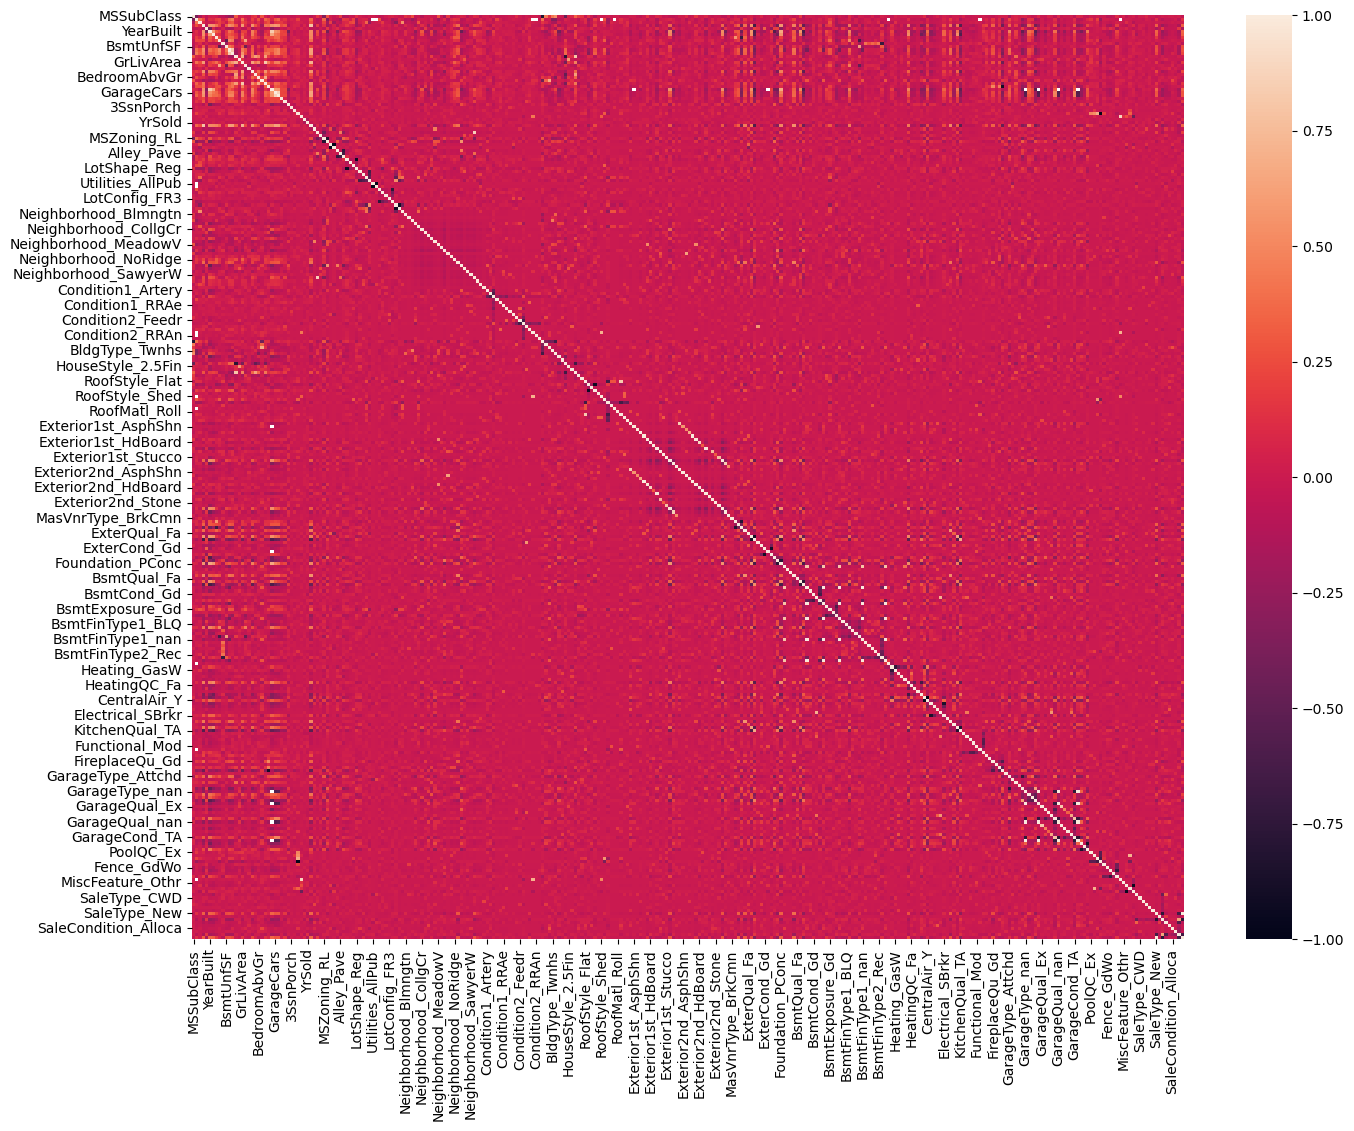

In [146]:
cor  = train_dataset.corr()

fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(cor, ax=ax)

Hапишем dataset

In [147]:
dataset = train_dataset


In [148]:
lable_train = dataset['SalePrice'].to_numpy()

lable_train

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [149]:
dataset = dataset.drop(['SalePrice'], axis=1)
data_train = dataset.to_numpy()
data_train

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

Модель

In [150]:
model = catboost.CatBoostRegressor(
    iterations=3000,
    learning_rate=1e-2,
    loss_function='RMSE',
    task_type="GPU",
    devices='0'
)

model

In [151]:
model.fit(data_train, lable_train)

0:	learn: 78864.4394888	total: 13.7ms	remaining: 41.2s
1:	learn: 78308.2749397	total: 27.7ms	remaining: 41.5s
2:	learn: 77755.6186961	total: 40.8ms	remaining: 40.8s
3:	learn: 77198.6619482	total: 56.3ms	remaining: 42.2s
4:	learn: 76648.0358094	total: 73.3ms	remaining: 43.9s
5:	learn: 76118.3151400	total: 90.9ms	remaining: 45.4s
6:	learn: 75591.5023106	total: 106ms	remaining: 45.2s
7:	learn: 75073.9368889	total: 120ms	remaining: 44.9s
8:	learn: 74571.7901337	total: 135ms	remaining: 45s
9:	learn: 74066.9953969	total: 149ms	remaining: 44.7s
10:	learn: 73574.9547000	total: 164ms	remaining: 44.4s
11:	learn: 73100.3002677	total: 178ms	remaining: 44.3s
12:	learn: 72598.2978479	total: 191ms	remaining: 43.8s
13:	learn: 72101.3345368	total: 205ms	remaining: 43.7s
14:	learn: 71623.7455970	total: 219ms	remaining: 43.5s
15:	learn: 71138.9730102	total: 233ms	remaining: 43.5s
16:	learn: 70660.6400700	total: 248ms	remaining: 43.5s
17:	learn: 70186.4967957	total: 262ms	remaining: 43.4s
18:	learn: 69743

Skore

In [152]:
model.score(data_train, lable_train)

0.9545211481512426

Predickt

In [153]:
test_data = pd.read_csv(file_dir+test_dit_name)
test_dataset = process_dataframe(test_data)

result = dataset.copy()
result.loc[:, :] = 0.0 
result[test_dataset.columns.intersection(dataset.columns)] = test_dataset[dataset.columns.intersection(test_dataset.columns)]

data_test = result.to_numpy()

In [154]:
data_test.shape

(1460, 303)

In [155]:
out = model.predict(data_test)

In [156]:
pd.DataFrame({
    'Id':range(1461+0, 1461+len(data_test)),
    'SalePrice':out
}).to_csv('sample_submission.csv', index=False)